In [184]:
import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

# exploring dataframe
pd.read_csv(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502\data\raw\ClimateData_UBCO.csv')

,Lat,long,elev,period,MAT,MWMT,MCMT,TD,MAP,MSP,...,RH(03),RH(04),RH(05),RH(06),RH(07),RH(08),RH(09),RH(10),RH(11),RH(12)
0,49.939,-119.396,446,year_1901,8.7,21.3,-3.8,25.1,293,139,...,65,58,56,59,53,49,63,59,75,77
1,49.939,-119.396,446,year_1902,8.0,18.4,-3.0,21.4,386,194,...,68,59,62,55,55,52,55,59,75,77
2,49.939,-119.396,446,year_1903,7.5,18.3,-2.1,20.4,399,248,...,60,59,57,56,59,63,68,64,74,74
3,49.939,-119.396,446,year_1904,8.6,19.9,-2.1,22.0,297,86,...,63,57,55,54,54,49,53,64,74,81
4,49.939,-119.396,446,year_1905,8.3,20.7,-2.1,22.8,300,176,...,67,55,58,58,52,54,64,67,74,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,49.939,-119.396,446,year_2015,10.9,22.5,0.0,22.5,332,120,...,69,61,57,59,60,61,63,70,81,83
115,49.939,-119.396,446,year_2016,10.4,21.5,-4.3,25.8,410,175,...,70,59,61,61,64,59,65,75,83,85
116,49.939,-119.396,446,year_2017,9.4,23.1,-4.0,27.1,365,99,...,75,69,60,60,56,57,62,69,84,80
117,49.939,-119.396,446,year_2018,9.6,22.1,0.7,21.4,451,152,...,83,64,58,61,58,61,67,70,83,89


In [278]:
# method chaining and creating a function for all my datasets with the same format
def load_and_process(path_to_csv_file):
    
    ##monthaly variables
    # load data and select variables of interest
    dataframe = (
                pd.read_csv(path_to_csv_file)
                .iloc[:,83:251]
    )
    
    # Create dataframe with labelled years
    annual_m = np.arange(1901, 2020, 1).repeat(12)
    annual_m2 = np.vstack(annual_m)
    years_m = pd.DataFrame(data = annual_m2)
    
    # Create list of Strings for each month
    months = [('Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')*119]
    months2 = (
        pd.DataFrame(months)
        .melt()
    )
    

    # Transpose and then melt monthly observations in Dataframe to get 
    # individual variables in separate columns and the months as observations instead of variables
    global monthly_data
    monthly_data = [months2, years_m]
    for i in range(14):
        monthly_data.append(dataframe.iloc[:,i*12:(i+1)*12].T.melt())
    
    # Cleaning dataframe
    monthly_data = (
                    pd.concat(monthly_data, axis = 1)
                    .drop(columns = 'variable')
    )
    
    # Label columns (variables)
    monthly_data.columns = ['Month','Year','Max Temp', 'Min Temp', 'Ave Temp', 'Precipitation', 'Radiation', 'DDays < 0°C', 'DDays > 5°C', 
                            'DDays < 18°C', 'DDays > 18°C', 'Frost Free Days', 'Snowfall', 'Evaporation', 
                            'Moisture Deficit', 'Relative Humidity']
    
    return monthly_data

    ## seasonal variables 
    # winter variables
    dataframe_s = (
                pd.read_csv(path_to_csv_file)
                .iloc[:,[27,31,35,39,47,51,55,59,63,67,71,75,79]]
    )
    
    # label years, fit together with rest of the dataframe
    annual_w = np.arange(1901, 2020, 1)
    annual_w2 = np.vstack(annual_w)
    years_s = pd.DataFrame(data = annual_w2)
    seasons = [years_s, dataframe_s]
    global seasonal_data
    seasonal_data = pd.concat(seasons, axis = 1)
    
    # label columns (variables)
    seasonal_data.columns = ['Year','Max Temp', 'Min Temp', 'Ave Temp', 'Precipitation', 'DDays < 0°C', 'DDays > 5°C', 
                            'DDays < 18°C', 'DDays > 18°C', 'Frost Free Days', 'Snowfall', 'Evaporation', 
                            'Moisture Deficit', 'Relative Humidity']
    
    return seasonal_data

    ## annual variables
    dataframe_a = (
                pd.read_csv(path_to_csv_file)
                .iloc[:,4:27]
    )
    years = [years_s, dataframe_a]
    global yearly_data
    yearly_data = pd.concat(years, axis = 1)
    
    # label columns (variables)
    yearly_data.columns = ['Year','Ave Temp','Warmest Month', 'Coldest Month','Difference', 'Mean Precip','May-Sep Precip','Heat-Moist I', 
                           'Summer Heat-Moist I', 'DDays < 0°C', 'DDays > 5°C', 'DDays < 18°C', 'DDays > 18°C', 
                           'Frost Free Days','Begin FFP','End FFP','Frost Free Period', 'Snowfall', 'Min Temp (30)', 'Max Temp (30)', 'Radiation',
                           'Evaporation', 'Moisture Deficit', 'Relative Humidity']
    
#     return yearly_data
    
load_and_process(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502\data\raw\ClimateData_Big_White.csv')
# load_and_process()
# print(load_and_process['seasonal_data'])

# monthly_data.to_csv(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502\data\processed\ClimateData_Big_White_months.csv', index=False)
# seasonal_data.to_csv(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502\data\processed\ClimateData_Big_White_seasons.csv', index=False)
# yearly_data.to_csv(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502\data\processed\ClimateData_Big_White_years.csv', index=False)


,Month,Year,Max Temp,Min Temp,Ave Temp,Precipitation,Radiation,DDays < 0°C,DDays > 5°C,DDays < 18°C,DDays > 18°C,Frost Free Days,Snowfall,Evaporation,Moisture Deficit,Relative Humidity
0,Jan,1901,-6.9,-13.2,-10.1,144,-9999.0,315,0,870,0,0,136,0,0,72
1,Feb,1901,-6.9,-13.8,-10.3,221,-9999.0,292,0,790,0,0,218,0,0,70
2,Mar,1901,-2.1,-9.1,-5.6,55,-9999.0,196,1,733,0,1,53,0,0,71
3,Apr,1901,0.4,-7.9,-3.8,69,-9999.0,142,2,653,0,1,67,0,0,66
4,May,1901,7.9,-1.3,3.3,67,-9999.0,13,27,455,0,10,33,62,0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,Aug,2019,15.0,7.0,11.0,48,-9999.0,0,184,219,1,30,2,70,22,74
1424,Sep,2019,7.1,3.4,5.2,188,-9999.0,5,50,383,1,23,40,27,0,87
1425,Oct,2019,0.4,-3.9,-1.8,89,-9999.0,96,8,615,0,5,74,0,0,82
1426,Nov,2019,-2.8,-6.9,-4.9,55,-9999.0,172,2,685,0,2,44,0,0,82


<AxesSubplot:xlabel='Month', ylabel='Snowfall'>

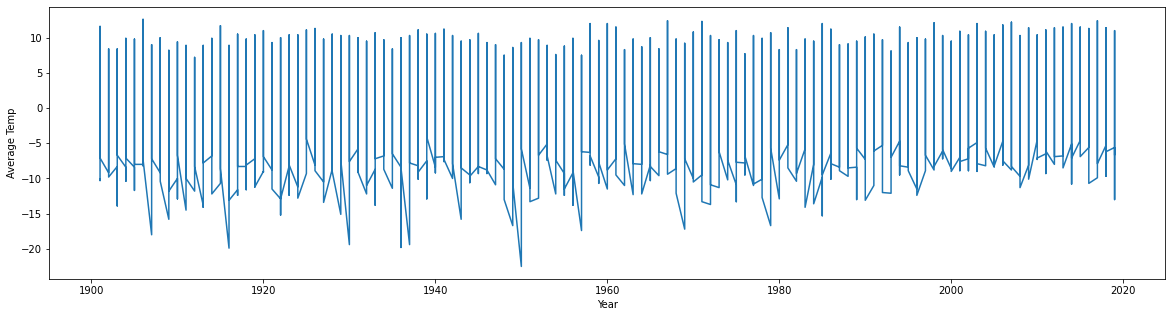

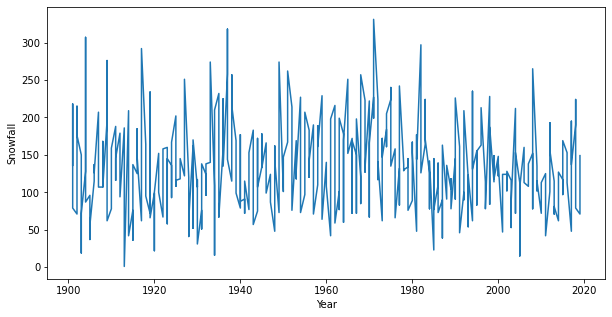

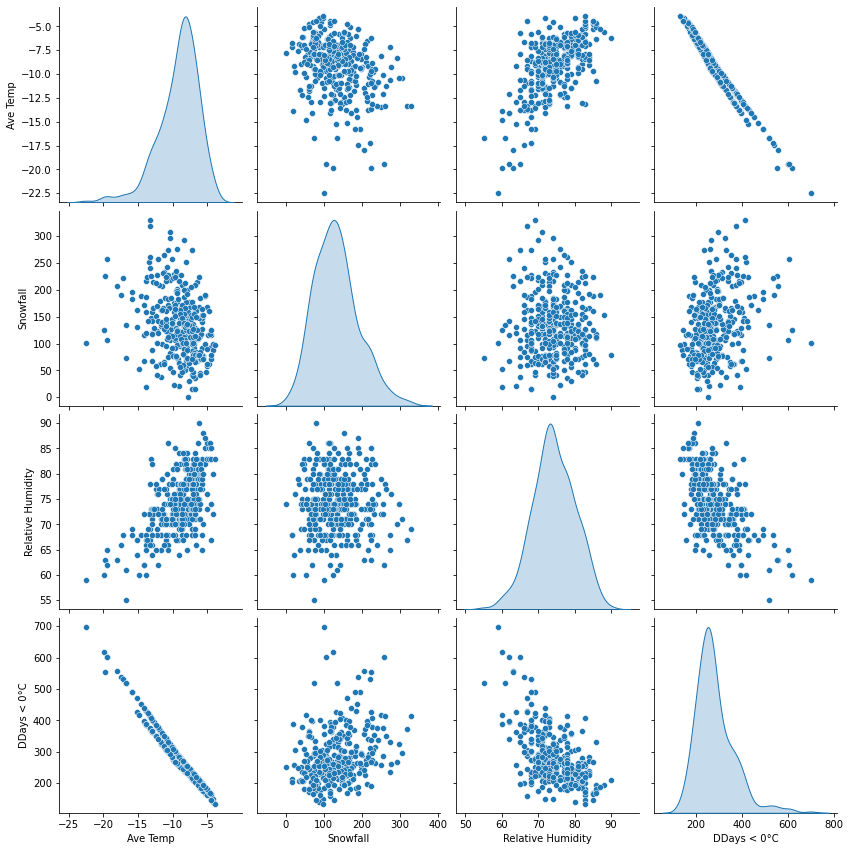

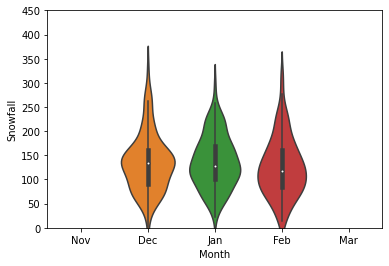

In [301]:
# # Exploratory Data Analysis
# monthly_data

# # seems like there is something wrong with the Radiation data (negative radiation). Investigating:
# monthly_data['Radiation'].value_counts()

# # the data assumes the Value **-9999.0** instead of **NaN** as null value. 
# # the majority of values is invalid, hence I'm dropping the column

# monthly_data = monthly_data.drop(columns = 'Radiation')
# monthly_data


# #exploring seasonal data 
# seasonal_data.shape
# seasonal_data.head(10)
# seasonal_data.columns
# seasonal_data.describe().apply(lambda s: s.apply(lambda x: format (x, 'f')))

# # Let's investigate how some variables change over time as well as possible correlations

# # Average termperatures over time
# plt.figure(figsize = (10,7))
# plt.plot(seasonal_data['Year'], seasonal_data['Max Temp'], linestyle='solid', marker=',', color='bisque')
# plt.plot(seasonal_data['Year'], seasonal_data['Ave Temp'], linestyle='solid', marker=',', color='red')
# plt.plot(seasonal_data['Year'], seasonal_data['Min Temp'], linestyle='solid', marker=',', color='plum')
# plt.xlabel('Year', fontsize = 15)
# plt.ylabel('Temperature', fontsize = 15)
# plt.legend(['Max Temp', 'Ave Temp', 'Min Temp'])

# # Snowfall over time
# plt.figure(figsize = (10,5))
# plt.plot(seasonal_data['Year'], seasonal_data['Snowfall'], linestyle='solid', marker=',', color='blue')
# plt.xlabel('Year', fontsize = 15)
# plt.ylabel('Snowfall', fontsize = 15)

# Correlation 
# selected_df_winter = seasonal_data.loc[:,['Ave Temp', 'Snowfall', 'Relative Humidity', 'DDays < 0°C']]
# sns.pairplot(selected_df_winter, kind = 'reg', diag_kind='kde', height=3)
# Just by looking at the graphs, it appears that there is a approximately linear relationship
# between Temperature and Relative Humidity which seems reasonable. 
# Other correlations are tougher to see at a first glance or simply not existant.

# Monthly 

plt.figure(figsize = (20,5))
plt.plot('Year','Ave Temp', data=monthly_data)
plt.xlabel('Year')
plt.ylabel('Average Temp')
# very inconclusive, the internal variation with the monthly scale seems overwhelming. 
# I will definitely need to smooth some lines to find general trends

# winter_months = ['Nov', 'Dec', 'Jan', 'Feb', 'Mar']
winter_months = ['Dec', 'Jan', 'Feb']

# Snowfall in single winter months
plt.figure(figsize = (10,5))
monthly_data_winter = monthly_data.loc[monthly_data['Month'].isin(winter_months)]
plt.plot('Year', 'Snowfall', data = monthly_data_winter)
plt.xlabel('Year')
plt.ylabel('Snowfall')

#Change in Snowfall depending on the month
selected_df_winter_months = monthly_data_winter.loc[:,['Month','Ave Temp', 'Snowfall', 'Relative Humidity', 'DDays < 0°C']]
sns.pairplot(selected_df_winter_months, kind = 'scatter', diag_kind='kde', height=3)



#Degree-days below freezing
plt.figure()
plt.plot('Year','DDays < 0°C',data = monthly_data_winter)
plt.xlabel('Year')
plt.ylabel('DDays < 0°C')

#Eplore what amounts of snowfall we're dealing with per month
snow_per_month = sns.violinplot(x=monthly_data_winter['Month'], y=monthly_data_winter['Snowfall'], order = ('Nov','Dec','Jan','Feb','Mar'))
snow_per_month.set_ylim([0,450])
snow_per_month




# Looking at it through a correlation matrix

# corr = monthly_data_winter.corr()
# fig, ax = plt.subplots(figsize = (20,20))
# sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, 
#             annot = True, cmap = sns.diverging_palette(220, 20, as_cmap=True))
